import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the data from the csv file
df = pd.read_csv('customer_data.csv')

df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,01-01-2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,02-01-2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,03-01-2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,04-01-2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,05-01-2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [5]:
#statistical data for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,2512.0,152443.931131,724.580482,151200.00,151815.7500,152443.500,153071.2500,153699.00
Age,2470.0,46.637652,18.186277,15.00,32.0000,47.000,62.0000,78.00
Referal,2357.0,0.652100,0.476405,0.00,0.0000,1.000,1.0000,1.00
Amount_spent,2270.0,1418.422577,878.507451,2.09,678.1925,1341.435,2038.1025,2999.98


In [6]:
#statistical data for object columns
df.describe(include=object).T

,count,unique,top,freq
Transaction_date,2512,2512,01-01-2019,1
Gender,2484,2,Female,1356
Marital_status,2512,2,Married,1473
State_names,2512,50,Illinois,67
Segment,2512,5,Basic,1136
Employees_status,2486,4,Employees,946
Payment_method,2512,3,PayPal,1168


In [7]:
df['Referal'].value_counts()

Referal
1.0    1537
0.0     820
Name: count, dtype: int64

In [8]:
df['Referal'].isnull().value_counts()

Referal
False    2357
True      155
Name: count, dtype: int64

In [9]:
#filling the null values with 0
df['Referal'].fillna(0, inplace=True)

In [10]:
df['Referal'].isnull().value_counts()

Referal
False    2512
Name: count, dtype: int64

In [11]:
df['Age'].isnull().value_counts()

Age
False    2470
True       42
Name: count, dtype: int64

In [12]:
#finding the median age 
median_age = df['Age'].median()
print(median_age)

47.0


In [13]:
#filling null values with the median age
df['Age'].fillna(median_age, inplace=True)

In [14]:
df['Age'].isnull().value_counts()

Age
False    2512
Name: count, dtype: int64

In [15]:
df['Amount_spent'].isnull().value_counts()

Amount_spent
False    2270
True      242
Name: count, dtype: int64

In [16]:
#calculation the mean amount spent and rounding it to 2 decimal points
mean_amount = round(df['Amount_spent'].mean(),2)
print(mean_amount)

1418.42


In [17]:
#filling the null values with the mean amount
df['Amount_spent'].fillna(mean_amount, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2512 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2512 non-null   float64
 10  Amount_spent      2512 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [19]:
#finding the count of unique values
df['Gender'].nunique()

2

In [20]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [21]:
df['Gender'].value_counts()

Gender
Female    1356
Male      1128
Name: count, dtype: int64

In [22]:
df['Gender'].isnull().value_counts()

Gender
False    2484
True       28
Name: count, dtype: int64

In [23]:
#Filling the null values with Others
df['Gender'].fillna('Others', inplace=True)

In [24]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [25]:
df['Employees_status'].value_counts()

Employees_status
Employees        946
workers          798
self-employed    487
Unemployment     255
Name: count, dtype: int64

In [26]:
df['Employees_status'].isnull().value_counts()

Employees_status
False    2486
True       26
Name: count, dtype: int64

In [27]:
#Filling the null values with not mentioned as the customer has not provided it
df['Employees_status'].fillna('Not mentioned', inplace=True)

In [28]:
df['Employees_status'].value_counts()

Employees_status
Employees        946
workers          798
self-employed    487
Unemployment     255
Not mentioned     26
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2512 non-null   object 
 3   Age               2512 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2512 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2512 non-null   float64
 10  Amount_spent      2512 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [30]:
#checking if any duplicate values are present
print(df.duplicated().sum())

0


In [31]:
#trying to see if two columns are correlated with one another or not
#Correlation ranges from -1 to 1
#1 indicating positive correlation - if one values increases other values will also increase by certain amount
#-1 indicating negative correlation - if one values increases other values will also decrease by certain amount
#0 indicates that there is no correlation
correlation = df['Age'].corr(df['Amount_spent'])
print(correlation)

-0.022128192357559015


In [32]:
#creating a new dataframe which contains only numeric values
df2 = df.select_dtypes(include='number')

<Axes: >

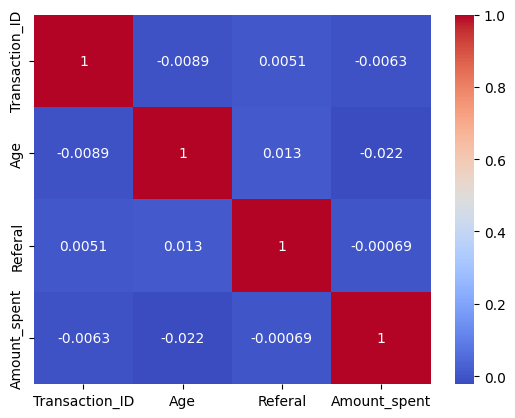

In [33]:
#using seaborn heatmap so that we can see the correlation between those numeric columns
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)

In [34]:
print(df['State_names'].unique())

['Kansas' 'Illinois' 'New Mexico' 'Virginia' 'Connecticut' 'Hawaii'
 'Florida' 'Vermont' 'California' 'Colorado' 'Iowa' 'South Carolina'
 'New York' 'Maine' 'Maryland' 'Missouri' 'North Dakota' 'Ohio' 'Nebraska'
 'Montana' 'Indiana' 'Wisconsin' 'Alabama' 'Arkansas' 'Pennsylvania'
 'New Hampshire' 'Washington' 'Texas' 'Kentucky' 'Massachusetts' 'Wyoming'
 'Louisiana' 'North Carolina' 'Rhode Island' 'West Virginia' 'Tennessee'
 'Oregon' 'Alaska' 'Oklahoma' 'Nevada' 'New Jersey' 'Michigan' 'Utah'
 'Arizona' 'South Dakota' 'Georgia' 'Idaho' 'Mississippi' 'Minnesota'
 'Delaware']


In [35]:
df['State_names'].value_counts().head(10)

State_names
Illinois         67
Georgia          64
Massachusetts    63
Maine            62
Kentucky         59
Minnesota        59
Missouri         57
Arizona          56
Delaware         56
Arkansas         55
Name: count, dtype: int64

In [36]:
df['State_names'].value_counts().tail(10)

State_names
Utah             43
New Hampshire    43
Indiana          43
Ohio             43
Alabama          42
Alaska           41
Nebraska         41
North Dakota     41
Kansas           41
Tennessee        39
Name: count, dtype: int64

In [37]:
#sorting the values using the column
df.sort_values(by=['State_names']).head(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
617,09-09-2020,151805,Male,43.0,Married,Alabama,Silver,Employees,PayPal,1.0,87.88
1856,31-01-2024,153044,Female,18.0,Married,Alabama,Silver,workers,PayPal,0.0,2091.73
2443,09-09-2025,153631,Male,60.0,Married,Alabama,Platinum,Employees,PayPal,1.0,1418.42
2441,07-09-2025,153629,Male,18.0,Single,Alabama,Platinum,Employees,Card,0.0,289.85
1023,20-10-2021,152211,Female,30.0,Married,Alabama,Platinum,Unemployment,Other,0.0,1418.42
1853,28-01-2024,153041,Male,18.0,Married,Alabama,Silver,Employees,Other,0.0,1418.42
1097,02-01-2022,152285,Female,59.0,Married,Alabama,Platinum,workers,Card,1.0,2747.99
1109,14-01-2022,152297,Female,73.0,Married,Alabama,Silver,self-employed,Other,0.0,851.25
2379,07-07-2025,153567,Female,34.0,Single,Alabama,Silver,Employees,PayPal,0.0,77.90
2348,06-06-2025,153536,Female,27.0,Married,Alabama,Basic,workers,Card,1.0,413.11


In [38]:
df.sort_values(by=['Amount_spent'], ascending = False).head(5)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
17,18-01-2019,151217,Female,77.0,Married,New Mexico,Platinum,workers,Card,0.0,2999.98
485,30-04-2020,151673,Male,65.0,Married,Arizona,Gold,self-employed,PayPal,1.0,2998.62
2279,29-03-2025,153467,Female,78.0,Single,Arizona,Silver,Employees,PayPal,1.0,2997.21
589,12-08-2020,151777,Male,51.0,Single,North Carolina,Missing,Employees,PayPal,1.0,2997.15
743,13-01-2021,151931,Male,44.0,Single,Illinois,Basic,Employees,Card,1.0,2996.82


In [39]:
#nlargest is another method to fetch the largest values from a column by passing the no_of_result 
#and the column name as the parameters
df.nlargest(5, 'Amount_spent')

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
17,18-01-2019,151217,Female,77.0,Married,New Mexico,Platinum,workers,Card,0.0,2999.98
485,30-04-2020,151673,Male,65.0,Married,Arizona,Gold,self-employed,PayPal,1.0,2998.62
2279,29-03-2025,153467,Female,78.0,Single,Arizona,Silver,Employees,PayPal,1.0,2997.21
589,12-08-2020,151777,Male,51.0,Single,North Carolina,Missing,Employees,PayPal,1.0,2997.15
743,13-01-2021,151931,Male,44.0,Single,Illinois,Basic,Employees,Card,1.0,2996.82


In [40]:
#nsmallest is another method to fetch the smallest values from a column by passing the no_of_result 
#and the column name as the parameters
df.nsmallest(5, 'Amount_spent')

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2468,04-10-2025,153656,Female,73.0,Married,Michigan,Gold,Employees,PayPal,1.0,2.09
568,22-07-2020,151756,Male,46.0,Single,South Carolina,Gold,workers,PayPal,0.0,2.16
2401,29-07-2025,153589,Female,60.0,Single,Maryland,Silver,Employees,PayPal,1.0,2.84
962,20-08-2021,152150,Female,56.0,Married,Nevada,Basic,workers,Other,1.0,5.31
860,10-05-2021,152048,Male,26.0,Single,Maryland,Silver,Unemployment,PayPal,1.0,5.55


In [41]:
#converting the type from object to datetime
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'], format='%d-%m-%Y')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_date  2512 non-null   datetime64[ns]
 1   Transaction_ID    2512 non-null   int64         
 2   Gender            2512 non-null   object        
 3   Age               2512 non-null   float64       
 4   Marital_status    2512 non-null   object        
 5   State_names       2512 non-null   object        
 6   Segment           2512 non-null   object        
 7   Employees_status  2512 non-null   object        
 8   Payment_method    2512 non-null   object        
 9   Referal           2512 non-null   float64       
 10  Amount_spent      2512 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 216.0+ KB


In [43]:
#fetching the name of the month and creating a new column
df['Month'] = df['Transaction_date'].dt.strftime('%B')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_date  2512 non-null   datetime64[ns]
 1   Transaction_ID    2512 non-null   int64         
 2   Gender            2512 non-null   object        
 3   Age               2512 non-null   float64       
 4   Marital_status    2512 non-null   object        
 5   State_names       2512 non-null   object        
 6   Segment           2512 non-null   object        
 7   Employees_status  2512 non-null   object        
 8   Payment_method    2512 non-null   object        
 9   Referal           2512 non-null   float64       
 10  Amount_spent      2512 non-null   float64       
 11  Month             2512 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 235.6+ KB


In [45]:
#fetch the year from the tranasction date
df['Year'] = df['Transaction_date'].dt.year

In [46]:
df['Month'].value_counts()

Month
January      217
March        217
May          217
July         217
August       217
October      217
April        210
June         210
September    210
February     198
November     196
December     186
Name: count, dtype: int64

In [47]:
df['Year'].value_counts()

Year
2020    366
2024    366
2019    365
2021    365
2022    365
2023    365
2025    320
Name: count, dtype: int64

In [48]:
#dropping the column transaction_date
df.drop('Transaction_date', axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    2512 non-null   int64  
 1   Gender            2512 non-null   object 
 2   Age               2512 non-null   float64
 3   Marital_status    2512 non-null   object 
 4   State_names       2512 non-null   object 
 5   Segment           2512 non-null   object 
 6   Employees_status  2512 non-null   object 
 7   Payment_method    2512 non-null   object 
 8   Referal           2512 non-null   float64
 9   Amount_spent      2512 non-null   float64
 10  Month             2512 non-null   object 
 11  Year              2512 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 225.8+ KB


In [50]:
condition1 = df['Marital_status'] == 'Single'
condition2 = (df['Employees_status'] == 'workers') | (df['Employees_status'] == 'Employees')
condition3 = df['Gender'] == 'Female'

df[condition1 & condition2 & condition3].head(10)

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent,Month,Year
24,151224,Female,32.0,Single,Montana,Basic,Employees,PayPal,0.0,2737.41,January,2019
31,151231,Female,21.0,Single,Montana,Basic,Employees,Card,0.0,2035.07,February,2019
56,151256,Female,67.0,Single,Iowa,Gold,Employees,PayPal,1.0,611.70,February,2019
58,151258,Female,32.0,Single,South Carolina,Basic,Employees,Other,0.0,676.70,February,2019
63,151263,Female,63.0,Single,Texas,Gold,Employees,Card,1.0,1218.56,March,2019
68,151263,Female,63.0,Single,Texas,Gold,Employees,Card,1.0,1218.56,March,2019
70,151265,Female,30.0,Single,California,Silver,workers,Card,0.0,1947.20,March,2019
77,151272,Female,69.0,Single,Texas,Missing,workers,Card,0.0,489.47,March,2019
92,151287,Female,45.0,Single,New York,Silver,workers,PayPal,0.0,1955.43,April,2019
95,151290,Female,51.0,Single,Arkansas,Platinum,workers,Card,1.0,2547.96,April,2019


In [51]:
df['Marital_status'].value_counts()

Marital_status
Married    1473
Single     1039
Name: count, dtype: int64

In [52]:
#grouping the data with the help of a column
df[['Age','Amount_spent']].groupby(df['Gender']).agg(['max','mean','count'])

Age                  Amount_spent                   
         max       mean count          max         mean count
Gender                                                       
Female  78.0  46.867257  1356      2999.98  1427.943857  1356
Male    78.0  46.481383  1128      2998.62  1408.674787  1128
Others  72.0  42.357143    28      2909.85  1349.995000    28

In [53]:
df[['Gender','Marital_status','Payment_method','Amount_spent']].groupby(['Gender','Marital_status','Payment_method']).agg(['max','min','count'])

Amount_spent               
                                              max      min count
Gender Marital_status Payment_method                            
Female Married        Card                2999.98    36.74   243
                      Other               2970.00     5.31   186
                      PayPal              2989.33     2.09   359
       Single         Card                2962.07    30.22   186
                      Other               2978.08    76.69   127
                      PayPal              2997.21     2.84   255
Male   Married        Card                2981.36    30.18   193
                      Other               2987.96     8.79   172
                      PayPal              2998.62     8.67   303
       Single         Card                2996.82    34.45   117
                      Other               2969.59    44.75   104
                      PayPal              2997.15     2.16   239
Others Married        Card                2621.11   828.41     5
                      Other               2848.56  1001.32     4
                      PayPal              2909.85   467.43     8
       Single         Card                2562.33   241.48     5
                      Other                215.16    52.08     2
                      PayPal              1909.77   105.04     4

In [54]:
pd.crosstab(df['Marital_status'],df['Payment_method'], margins=True, margins_name='Total')

Payment_method,Card,Other,PayPal,Total
Marital_status,,,,
Married,441,362,670,1473
Single,308,233,498,1039
Total,749,595,1168,2512


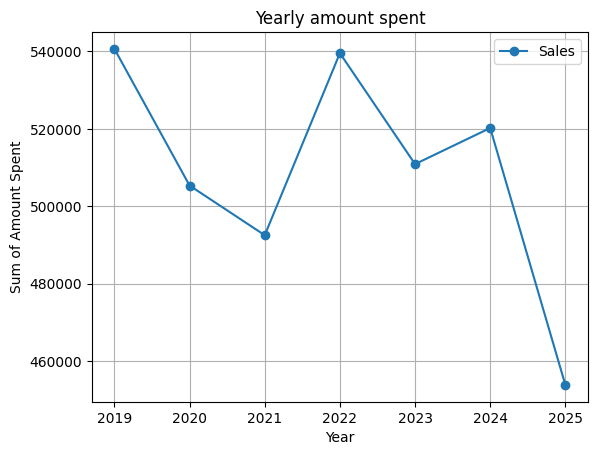

In [55]:
#creating a line plot

yearly_sales = df.groupby('Year')['Amount_spent'].sum().reset_index()

plt.plot(yearly_sales['Year'], yearly_sales['Amount_spent'], marker='o', label='Sales')

plt.xlabel('Year')
plt.ylabel('Sum of Amount Spent')
plt.grid(True)
plt.title('Yearly amount spent')
plt.legend()

plt.show()

According to the above graph, we can see that in the year 2019 we had very good sales but gradually decreased in the years 2020 and 2021, then it was revived and reached the highest sales compared to the last two years in 2022. Then there was again an decrease in the sale in 2023. In the year 2024, it was better than 2023, but still not the best. Then the sales dropped drastically in the year 2025.

<Axes: xlabel='Payment_method'>

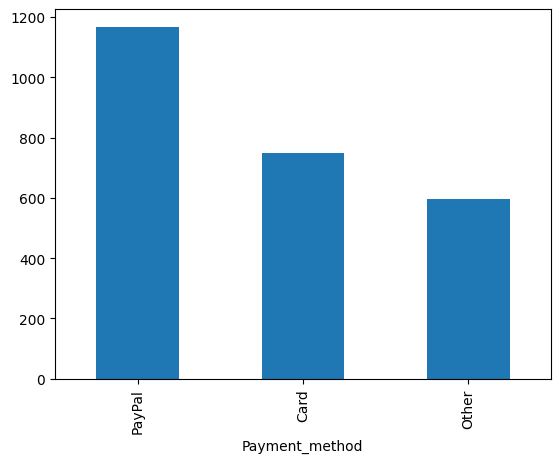

In [56]:
df['Payment_method'].value_counts().plot(kind='bar')

Most of the customers are paying using PayPal and then second to that is paying using Card and finally the least payment_mode is others.

<Axes: ylabel='Employees_status'>

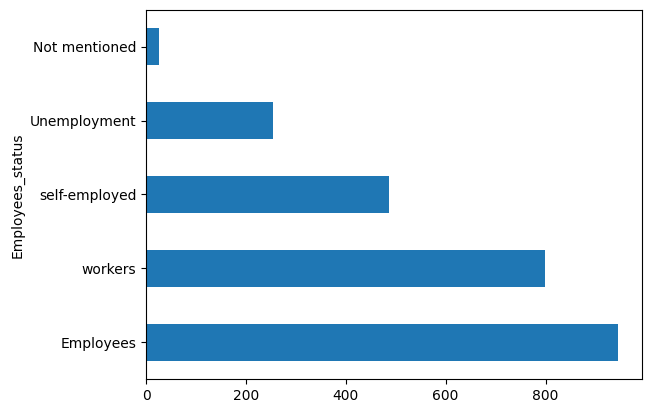

In [57]:
df['Employees_status'].value_counts().plot(kind="barh")

From the above graph, we can see that most of the customers are employees.

<Axes: ylabel='count'>

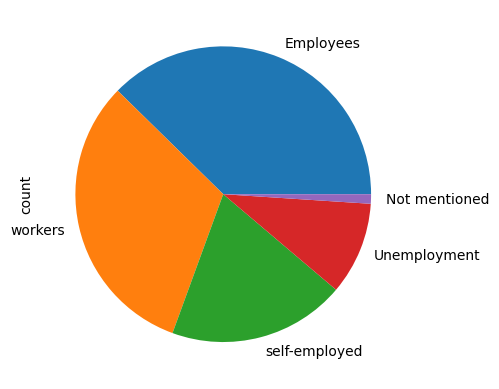

In [58]:
df['Employees_status'].value_counts().plot(kind="pie")